In [1]:
import pandas as pd
import json
from itertools import product

from utils.static import *
from utils.plots import *

In [2]:
plot = Plot()

In [3]:
D_p_dists = {}
D_p_edges = {}

M_p_dists = {}
M_p_edges = {e_mes : [] for e_mes in E_MES}

for p in P_NAME:
    D_p_dists[p] = {}
    D_p_edges[p] = {}
    M_p_dists[p] = {metric.id : [] for metric in METRICS}
    for (g, w) in product(G_NAME, W_NAME):
        D_p_dists[p][(g, w)] = {}
        D_p_edges[p][(g, w)] = {}
        for s in S_NAME:
            D_p_dists[p][(g, w)][s] = pd.read_csv(
                f'results/perturbation/{p}/{g}/{w}/distances/{s}.csv', header = [0,1])
            D_p_edges[p][(g, w)][s] = pd.read_csv(
                f'results/perturbation/{p}/{g}/{w}/edges/{s}.csv', header = [0,1])
            
            for m in METRICS:
                M_p_dists[p][m.id].append(D_p_dists[p][(g, w)][s][m.id]['mean'].max())
            for e_mes in E_MES:
                M_p_edges[e_mes].append(D_p_edges[p][(g, w)][s][e_mes]['mean'].max())

for p in P_NAME:
    for m in METRICS:
        M_p_dists[p][m.id] = pretty_upper_bound(np.max(M_p_dists[p][m.id]))
for e_mes in E_MES:
    M_p_edges[e_mes] = pretty_upper_bound(np.max(M_p_edges[e_mes]))

In [12]:
for g in G_NAME:
    for w in W_NAME:
        for p in P_NAME:
            for m in METRICS:
                plot.perturbation_distances(
                    D_p_dists[p], g, w, m, p, y_axis_range=(0, M_p_dists[p][m.id]))

<Figure size 432x288 with 0 Axes>

In [13]:
for g in G_NAME:
    for w in W_NAME:
        for p in P_NAME:
            for e_mes in E_MES:
                plot.perturbation_edges(
                    D_p_edges[p], g, w, e_mes, p, y_axis_range=(0, M_p_edges[e_mes]))

<Figure size 432x288 with 0 Axes>

In [4]:
for p in P_NAME:
    for m in METRICS:
        plot.perturbation_deviation(D_p_dists[p], m, p)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
D_g_dists = {}
D_g_edges = {}

M_g_dists = {m.id : [] for m in METRICS}
M_g_edges = {e_mes : [] for e_mes in E_MES}

for (g, w) in product(G_NAME, W_NAME):
    D_g_dists[(g, w)] = {}
    D_g_edges[(g, w)] = {}
    for s in S_NAME:
        D_g_dists[(g, w)][s] = pd.read_csv(
            f'results/gaussian_noise/{g}/{w}/distances/{s}.csv', header = [0,1], index_col=0)
        D_g_edges[(g, w)][s] = pd.read_csv(
            f'results/gaussian_noise/{g}/{w}/edges/{s}.csv', header = [0,1], index_col=0)
        
        for m in METRICS:
            M_g_dists[m.id].append(D_g_dists[(g, w)][s][m.id]['mean'].max())
        for e_mes in E_MES:
            M_g_edges[e_mes].append(D_g_edges[(g, w)][s][e_mes]['mean'].max())
            
for m in METRICS:
    M_g_dists[m.id] = pretty_upper_bound(np.max(M_g_dists[m.id]))
for e_mes in E_MES:
    M_g_edges[e_mes] = pretty_upper_bound(np.max(M_g_edges[e_mes]))

In [4]:
for g in G_NAME:
    for w in W_NAME:
        for m in METRICS:
            plot.gaussian_noise_distances(D_g_dists, g, w, m, y_axis_range = (0, M_g_dists[m.id]))

<Figure size 432x288 with 0 Axes>

In [5]:
for g in G_NAME:
    for w in W_NAME:
        for e_mes in E_MES:
            plot.gaussian_noise_edges(D_g_edges, g, w, e_mes, y_axis_range = (0, M_g_edges[e_mes]))

<Figure size 432x288 with 0 Axes>

In [4]:
for m in METRICS:
    plot.gaussian_noise_deviation(D_g_dists, m)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
D_c = {}

for s in S_NAME:
    D_c[s] = pd.read_csv(f'results/clustering/{s}.csv')

with open(f'results/clustering/labels.json', "r") as json_file:
    labels = json.load(json_file)

In [6]:
for metric in METRICS:
    plot.clustering_precision_recall(D_c, metric, labels, ['graph', 'weight'])
    plot.clustering_precision_recall(D_c, metric, labels, ['graph'])
    plot.clustering_precision_recall(D_c, metric, labels, ['weight'])

<Figure size 432x288 with 0 Axes>

In [7]:
for metric in METRICS:
    plot.clustering_precision_recall_3D(D_c, metric, labels, ['graph', 'weight'])
    plot.clustering_precision_recall_3D(D_c, metric, labels, ['graph'])
    plot.clustering_precision_recall_3D(D_c, metric, labels, ['weight'])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Nicol\Documents\EPFL\MA4\Graph sparsification\Code\utils\plots.py:271: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25, 10))


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['red', 'orange', 'yellow'])
dict_values(['green', 'blue', 'pink', 'violet'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


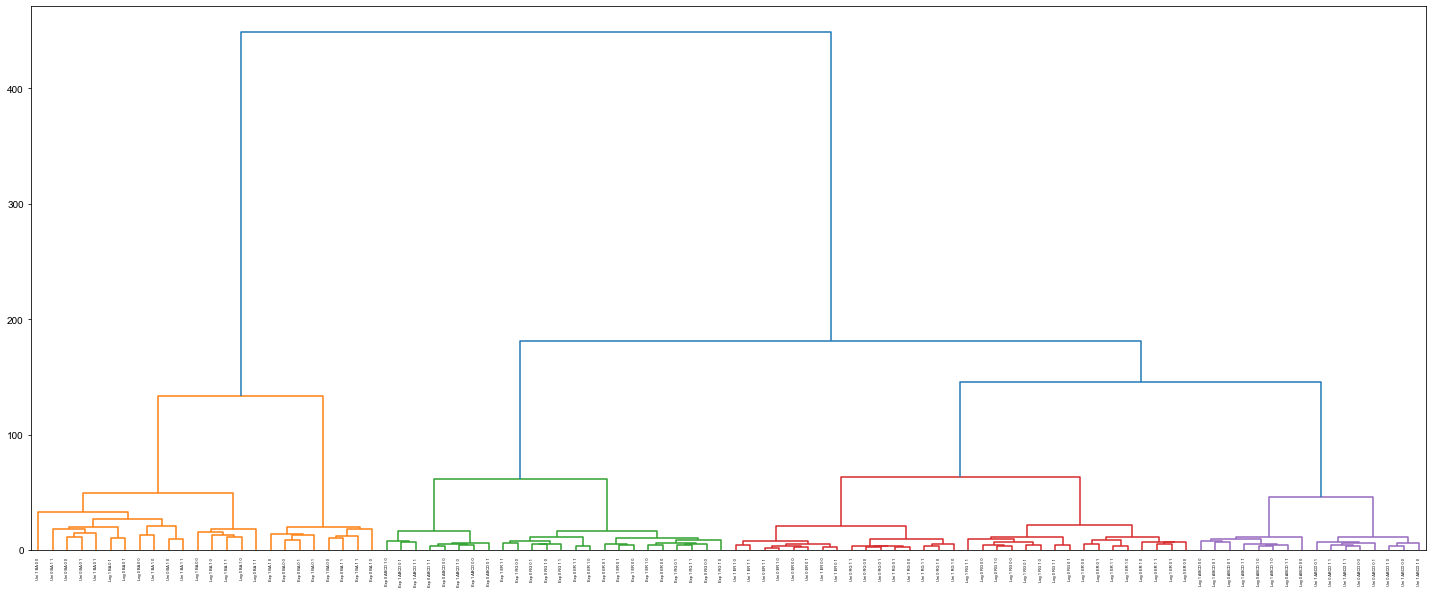

<Figure size 720x360 with 0 Axes>

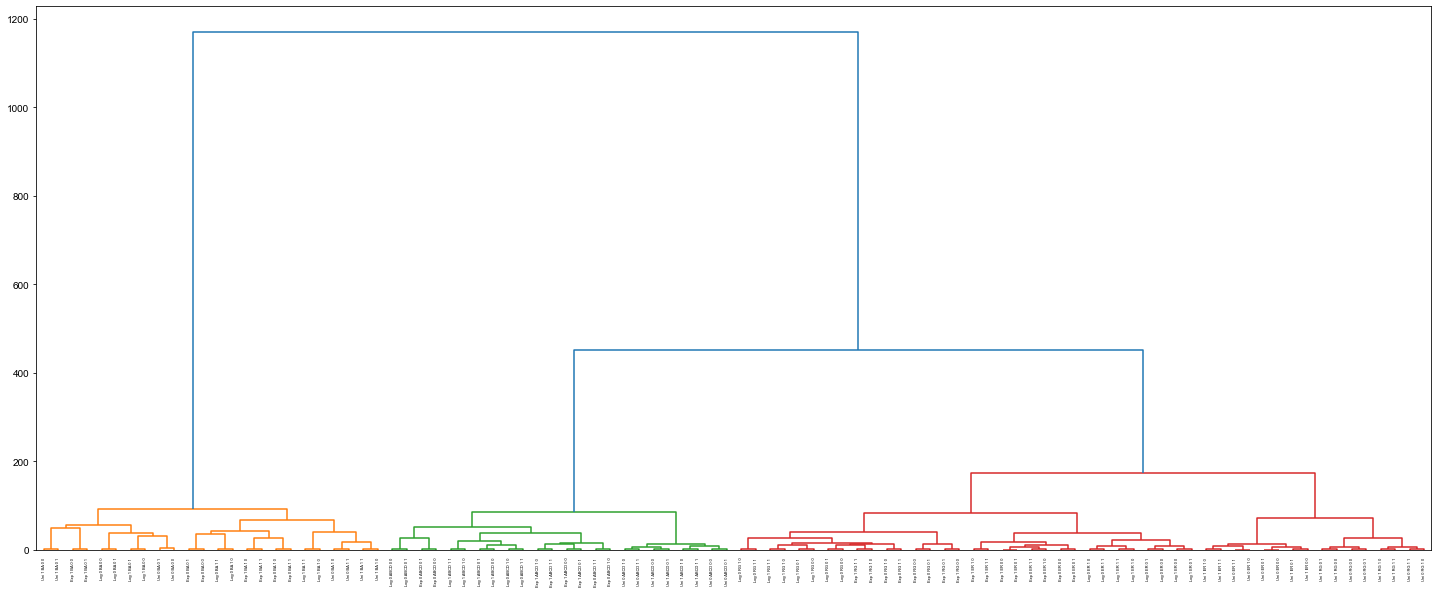

<Figure size 720x360 with 0 Axes>

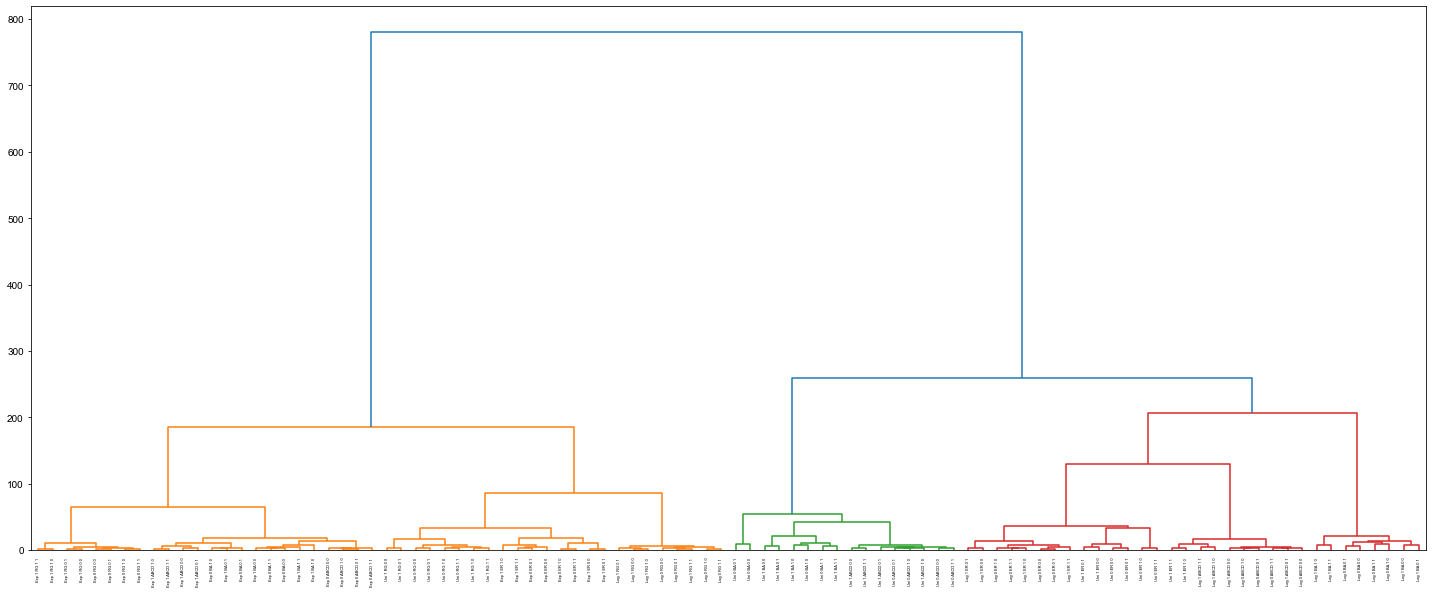

<Figure size 720x360 with 0 Axes>

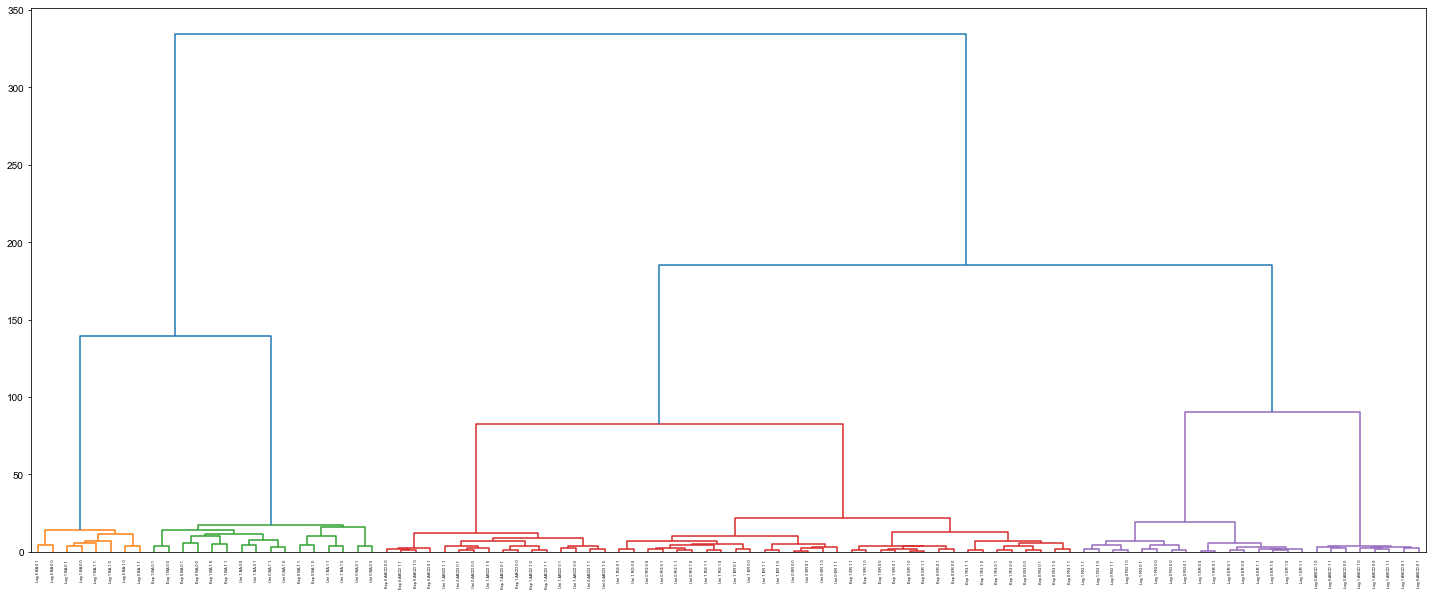

<Figure size 720x360 with 0 Axes>

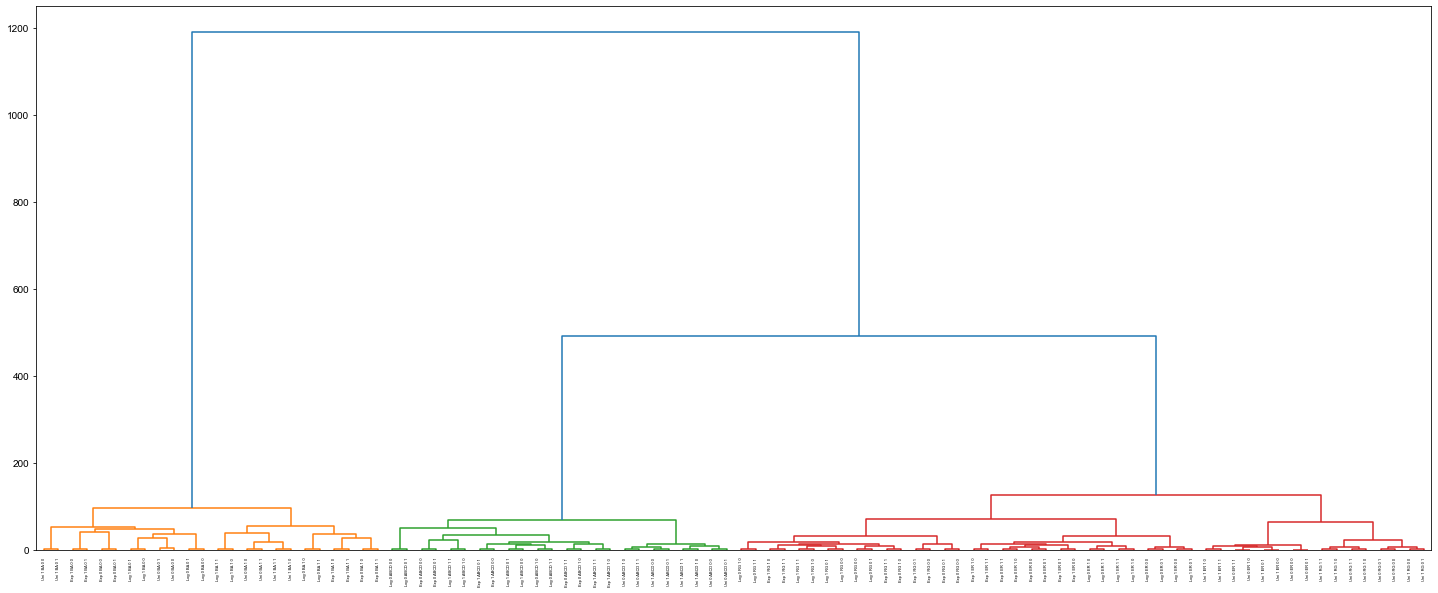

<Figure size 720x360 with 0 Axes>

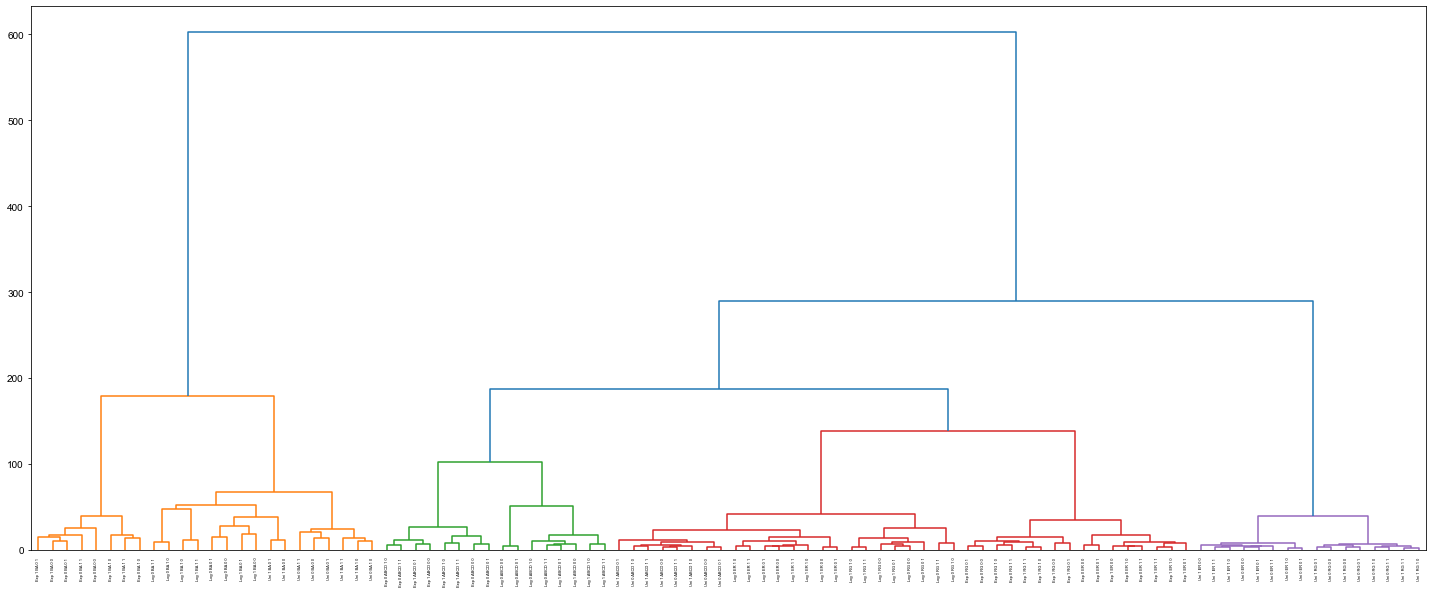

<Figure size 720x360 with 0 Axes>

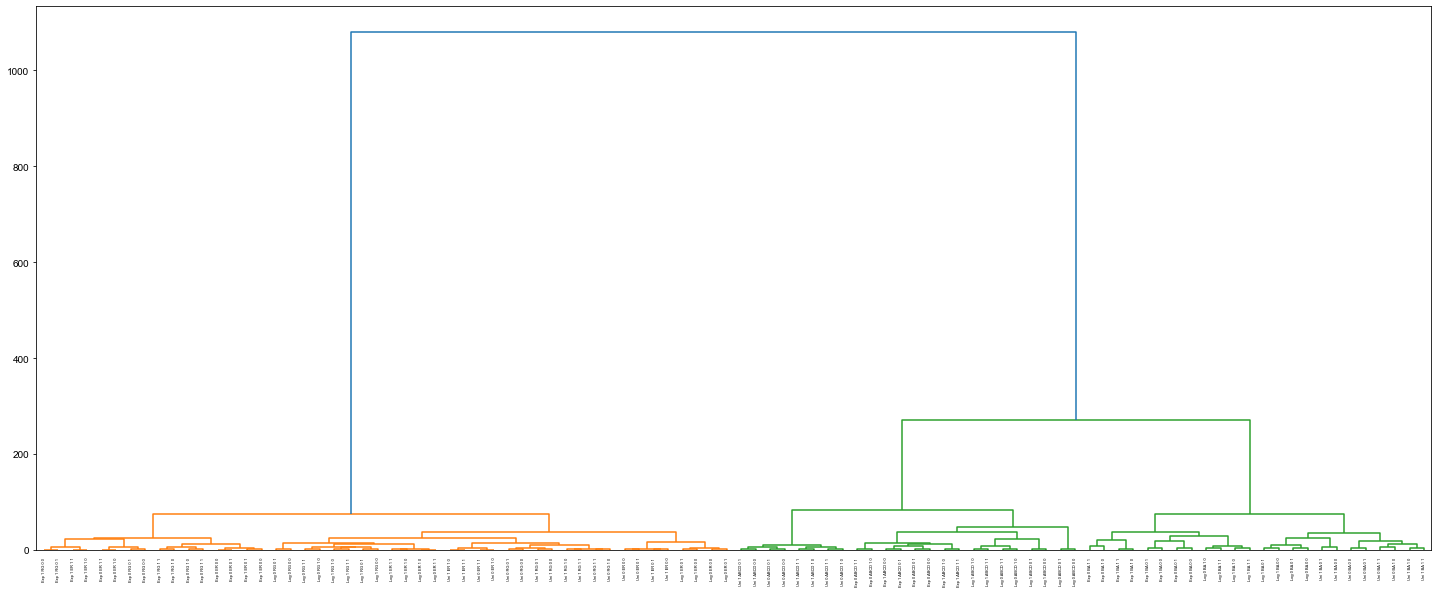

<Figure size 720x360 with 0 Axes>

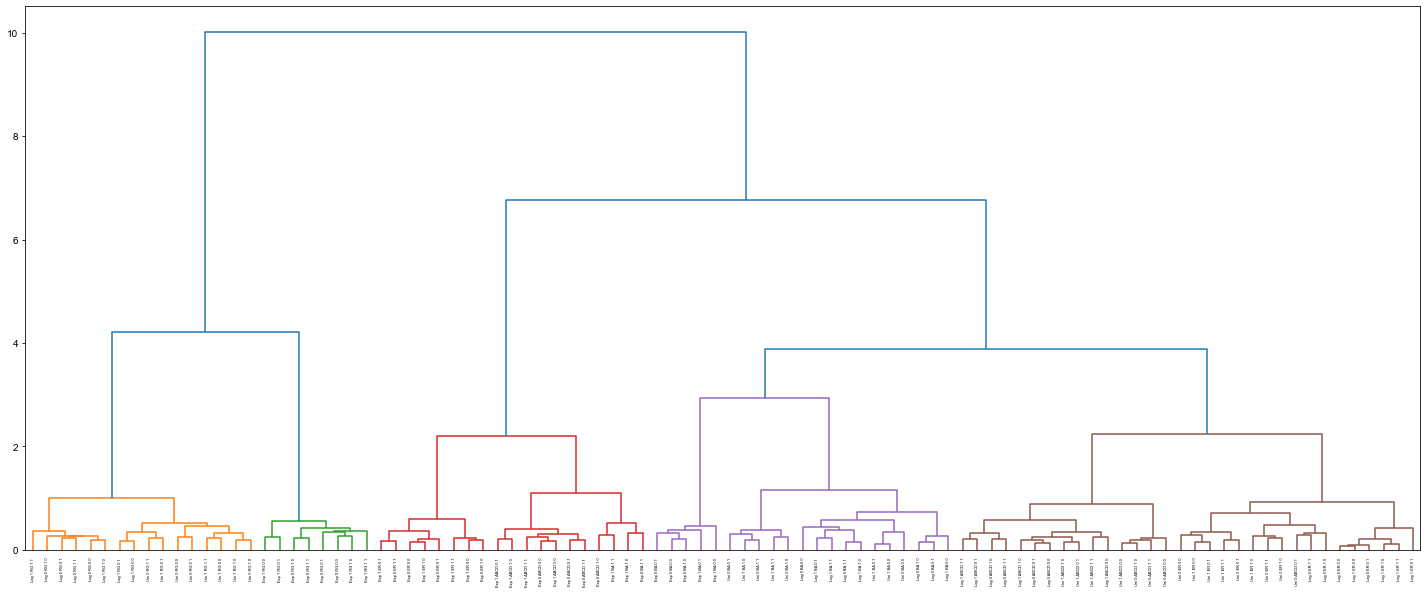

<Figure size 720x360 with 0 Axes>

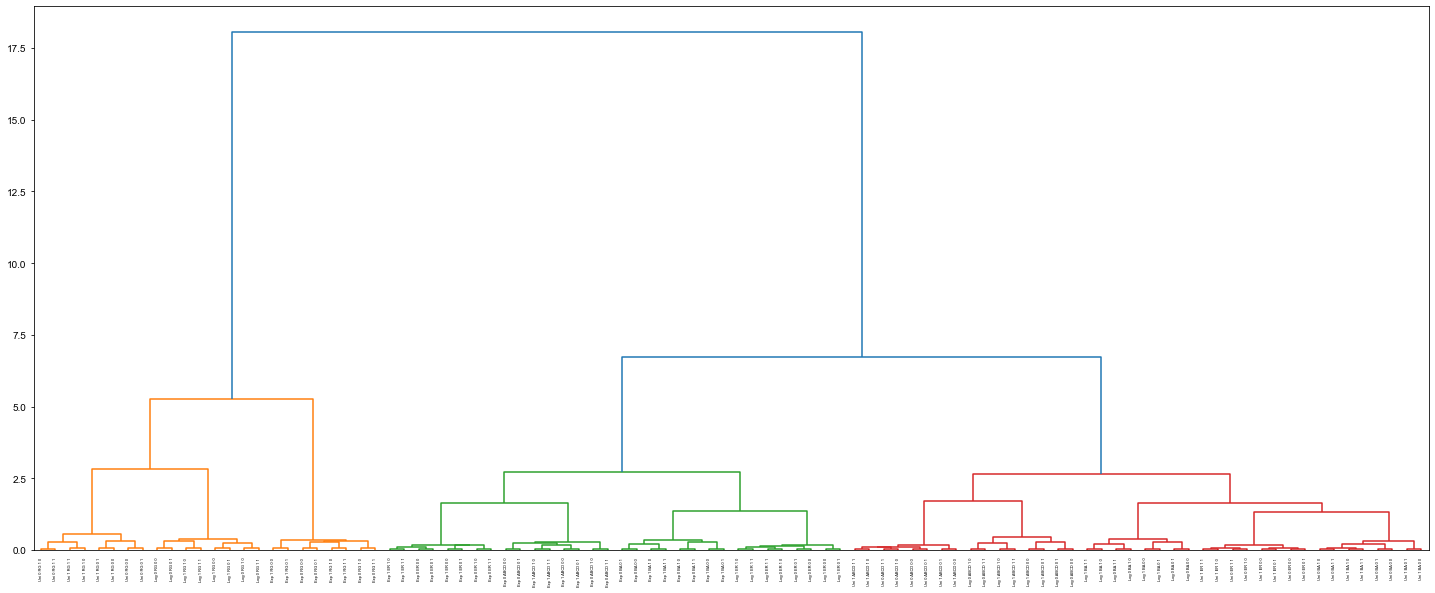

<Figure size 720x360 with 0 Axes>

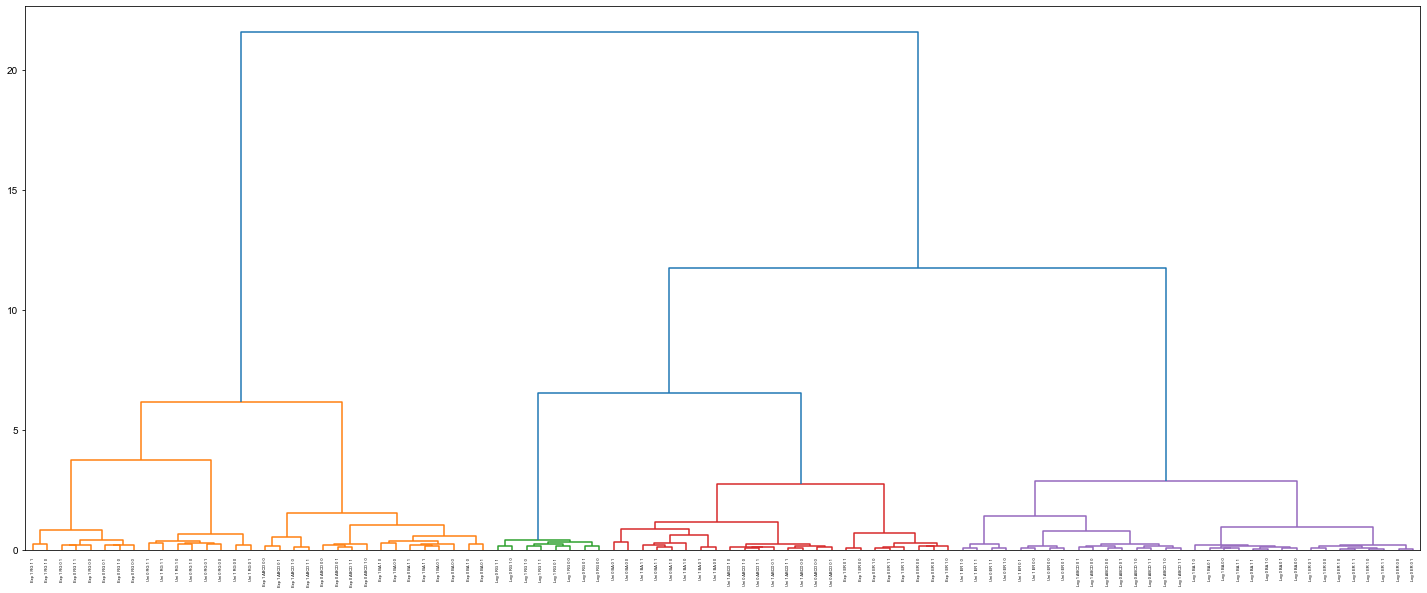

<Figure size 720x360 with 0 Axes>

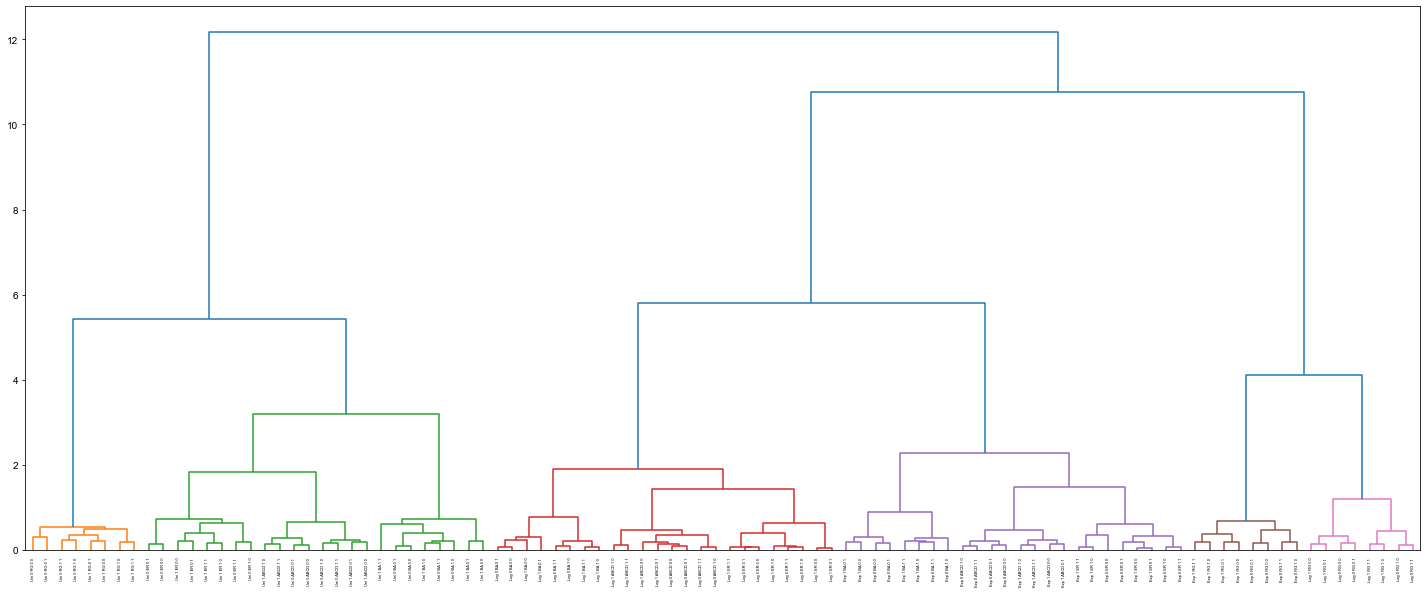

<Figure size 720x360 with 0 Axes>

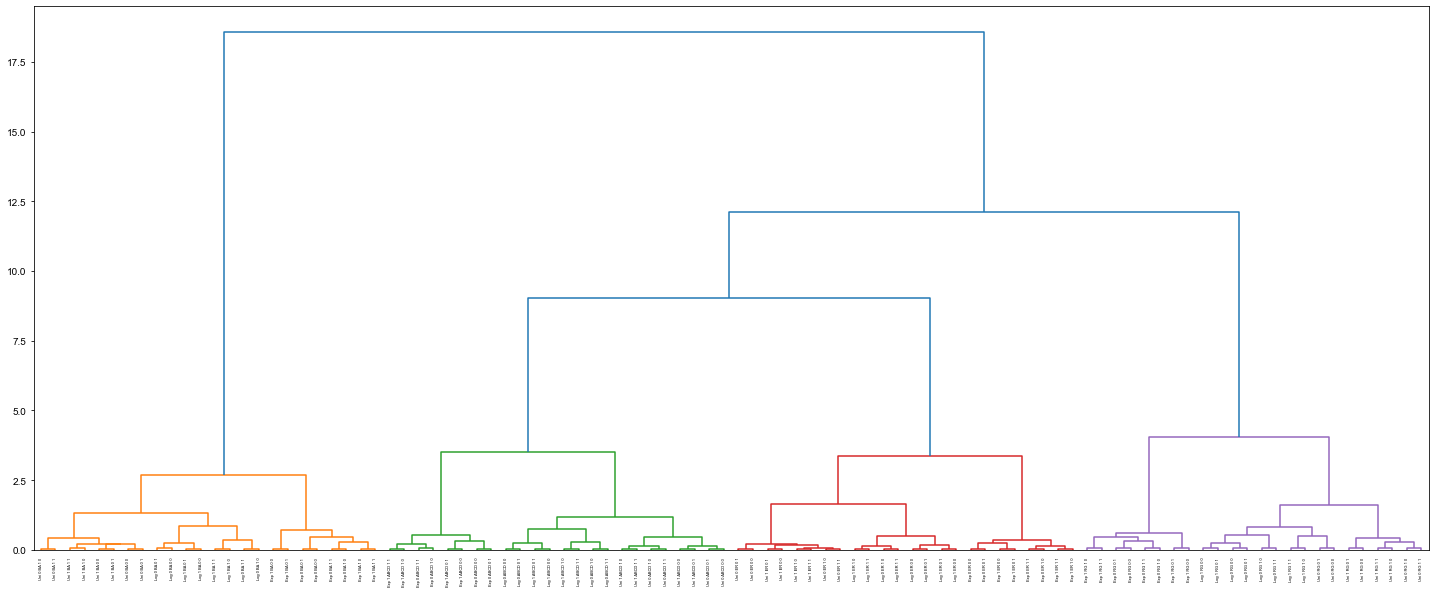

<Figure size 720x360 with 0 Axes>

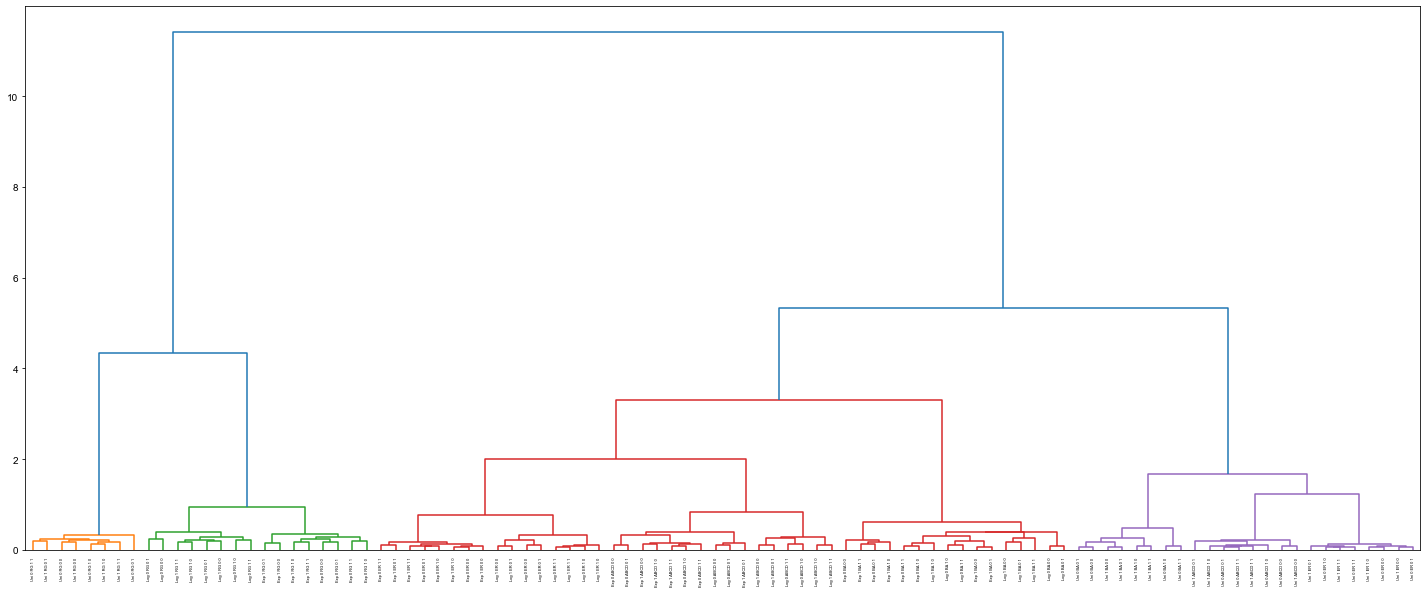

<Figure size 720x360 with 0 Axes>

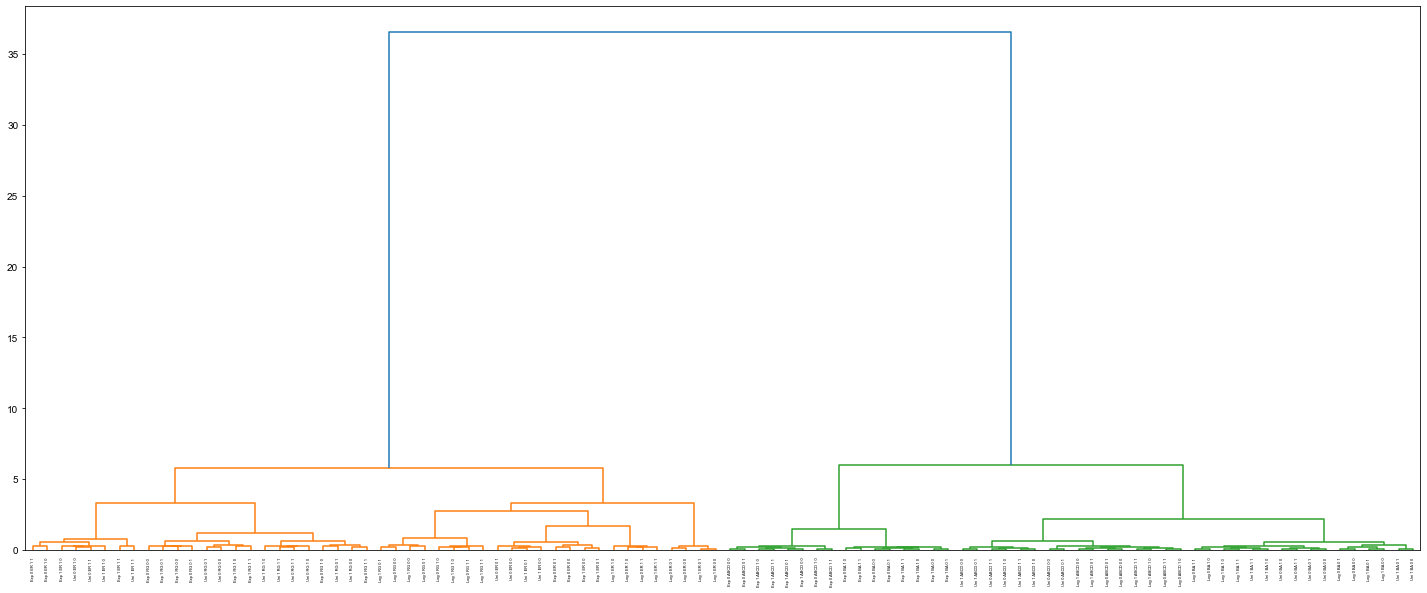

<Figure size 720x360 with 0 Axes>

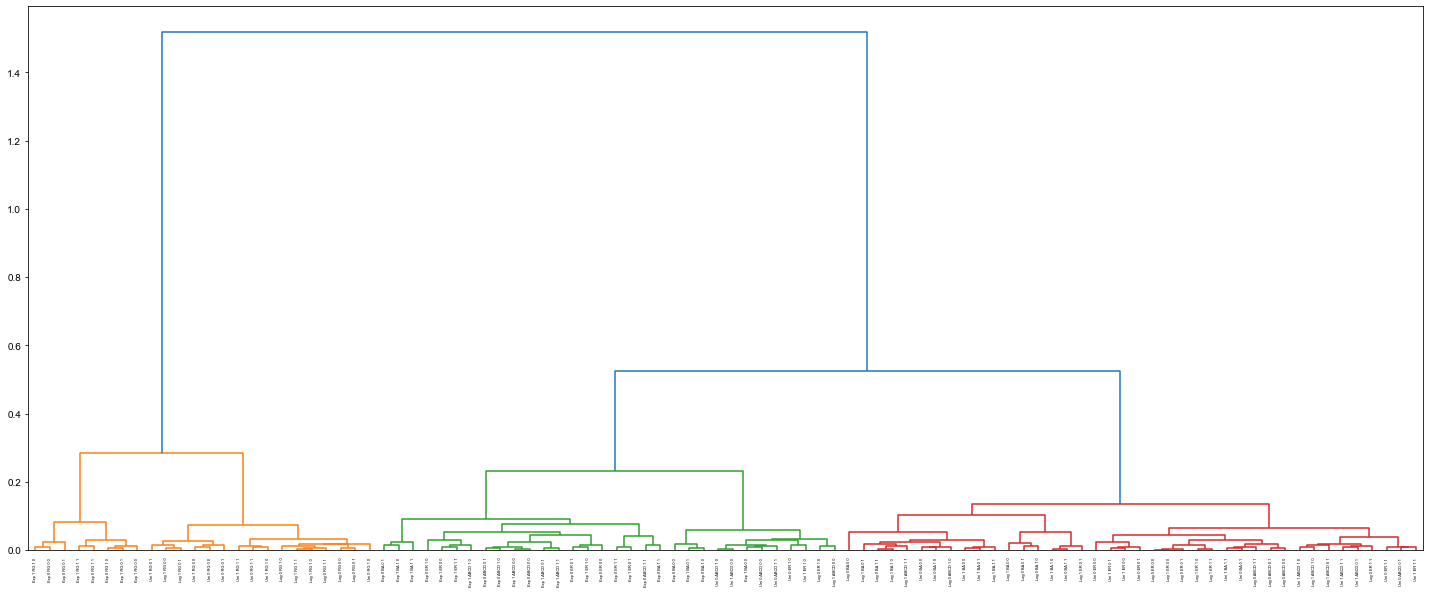

<Figure size 720x360 with 0 Axes>

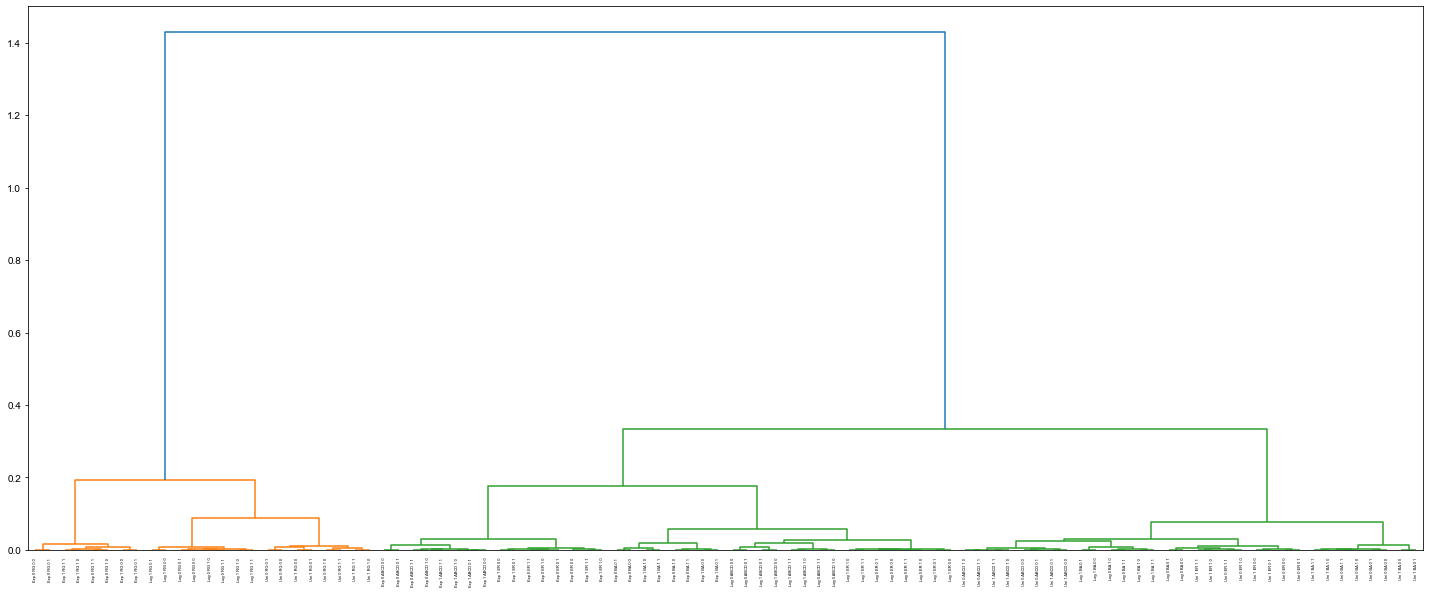

<Figure size 720x360 with 0 Axes>

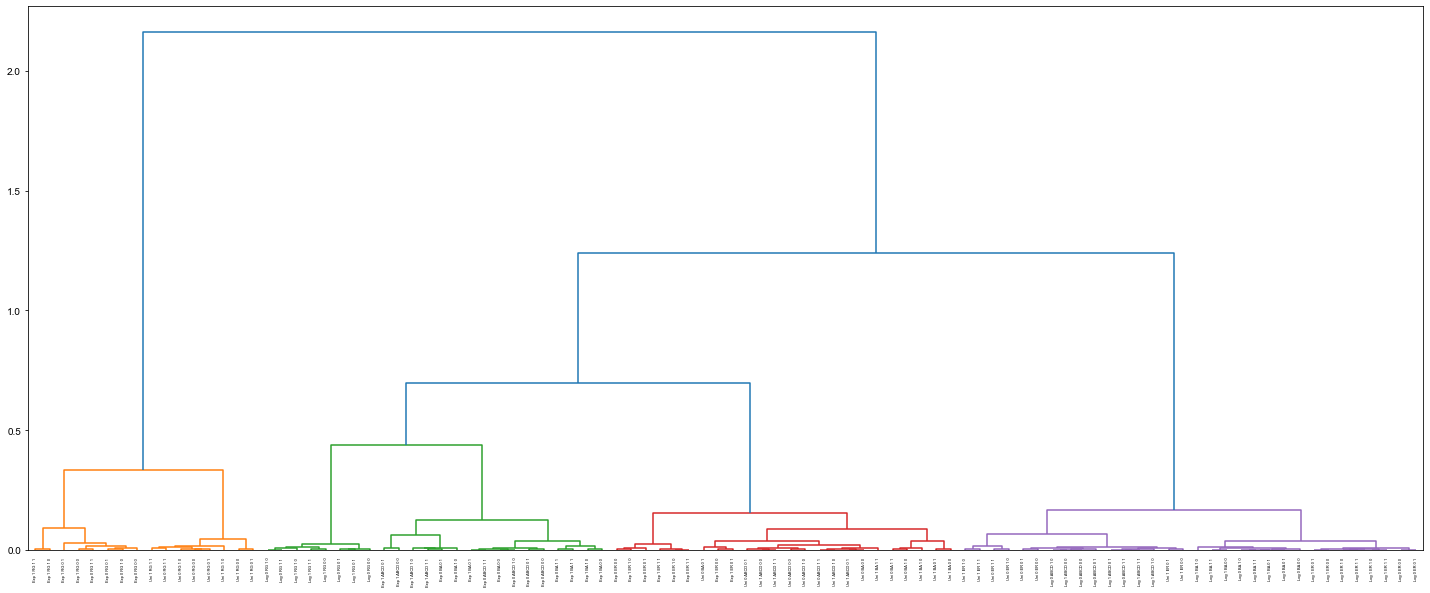

<Figure size 720x360 with 0 Axes>

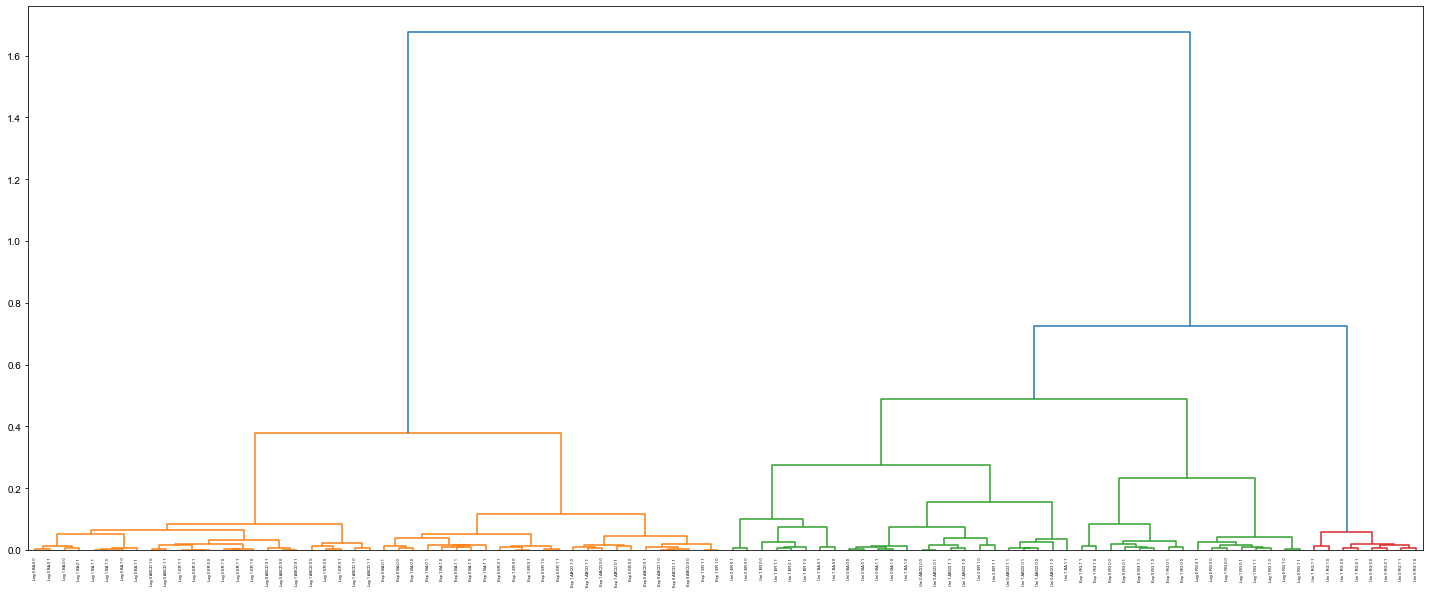

<Figure size 720x360 with 0 Axes>

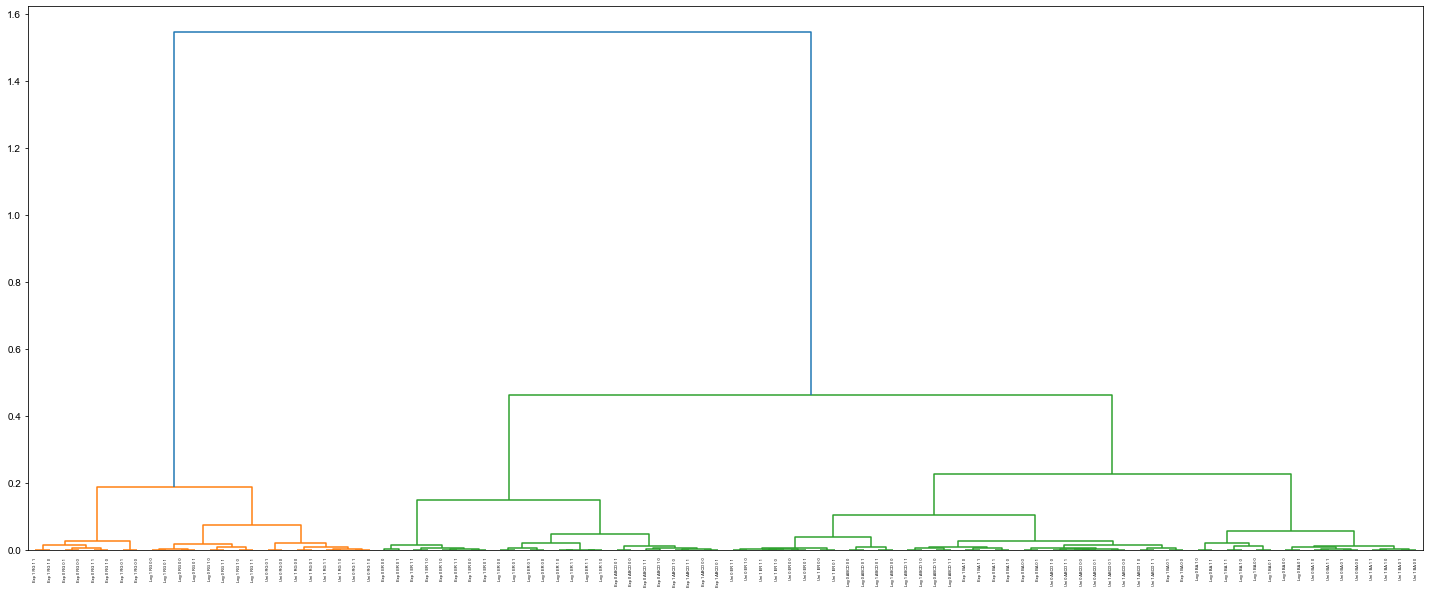

<Figure size 720x360 with 0 Axes>

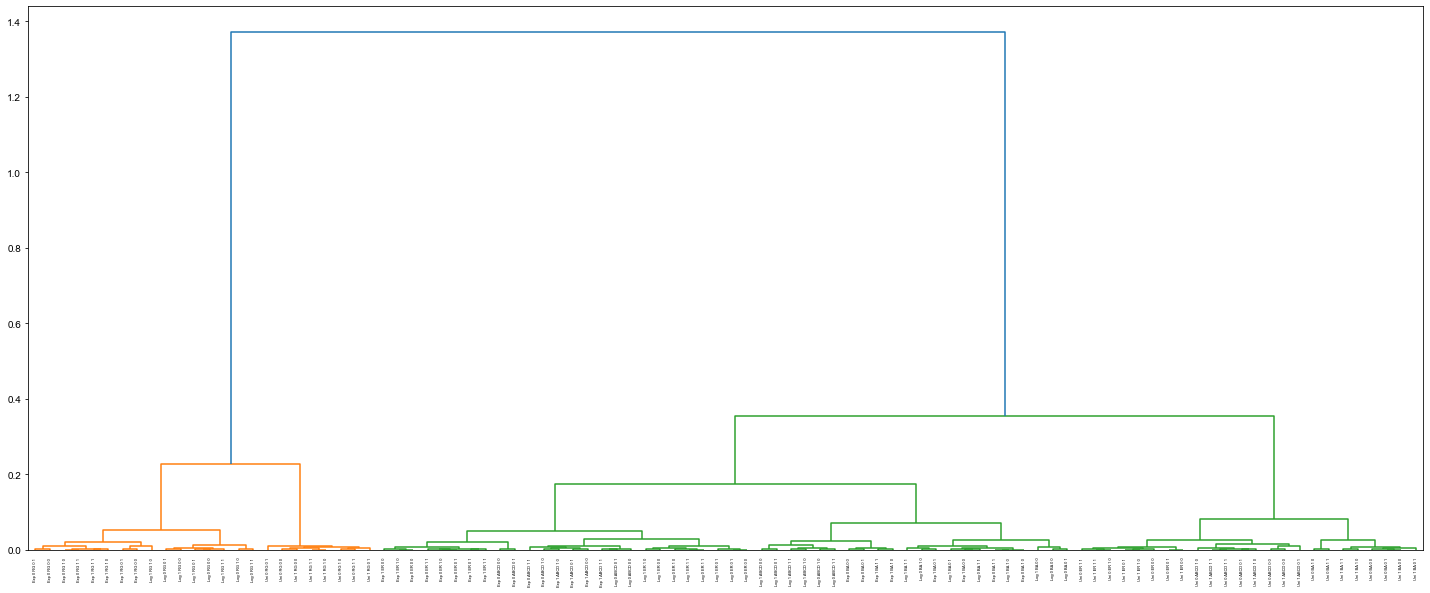

<Figure size 720x360 with 0 Axes>

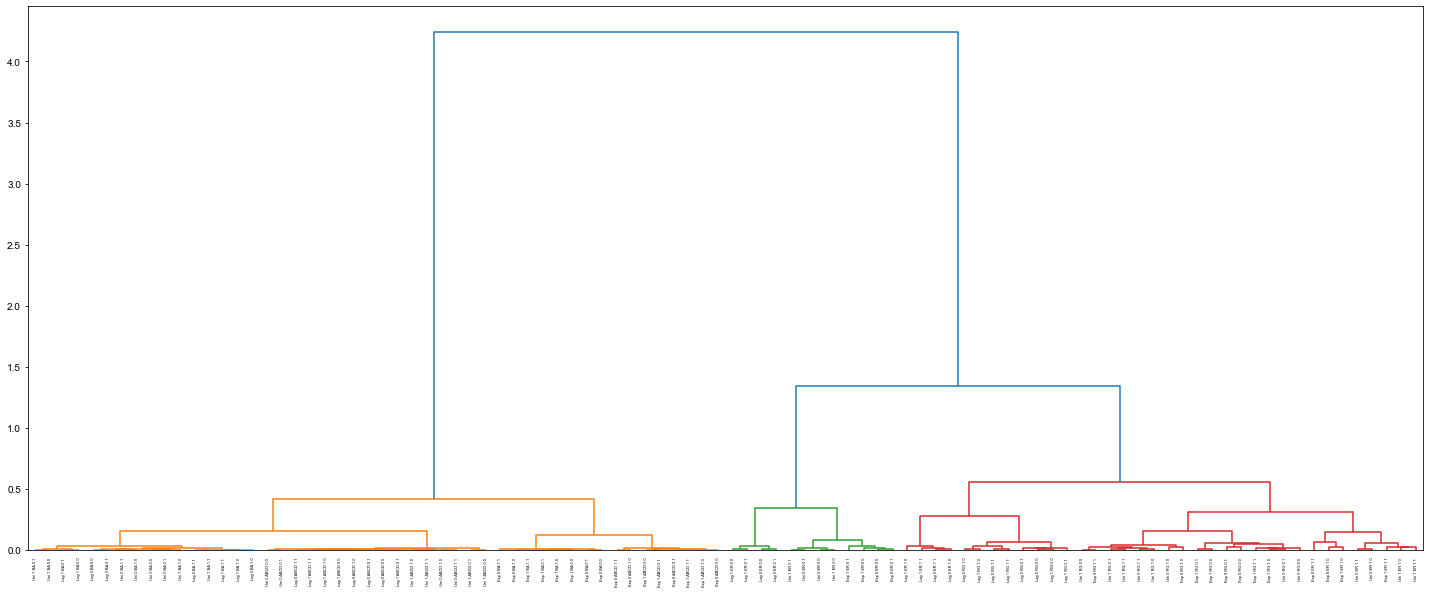

<Figure size 720x360 with 0 Axes>

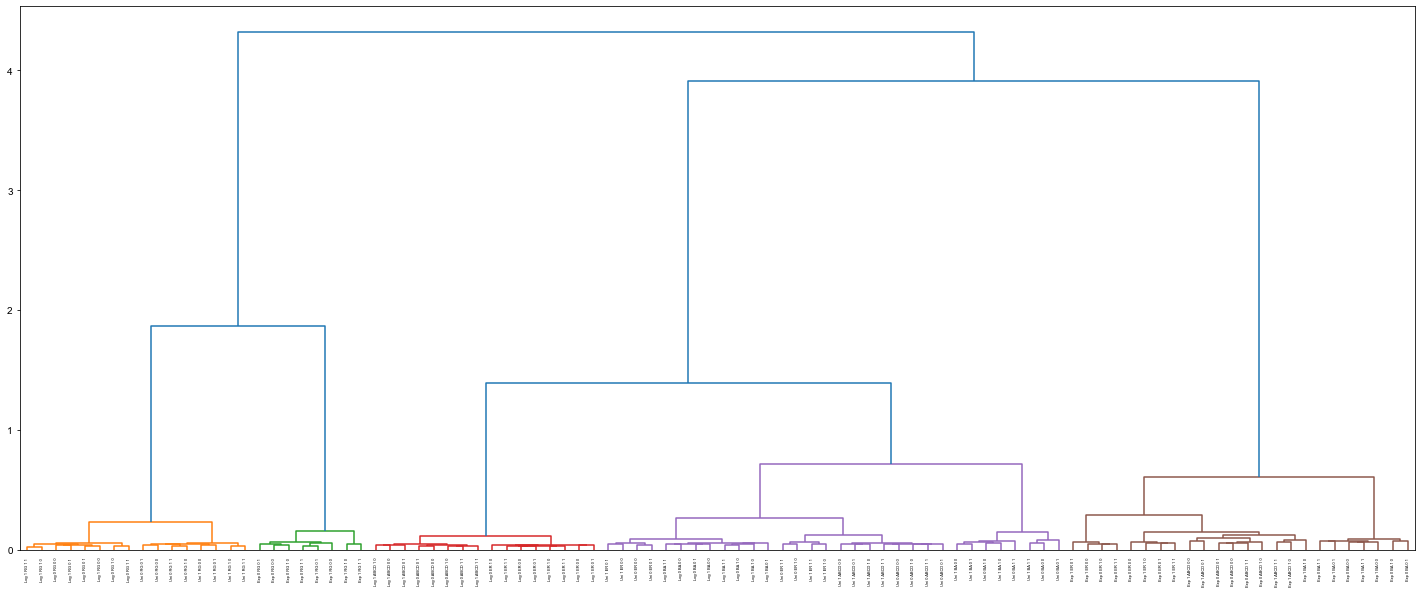

<Figure size 720x360 with 0 Axes>

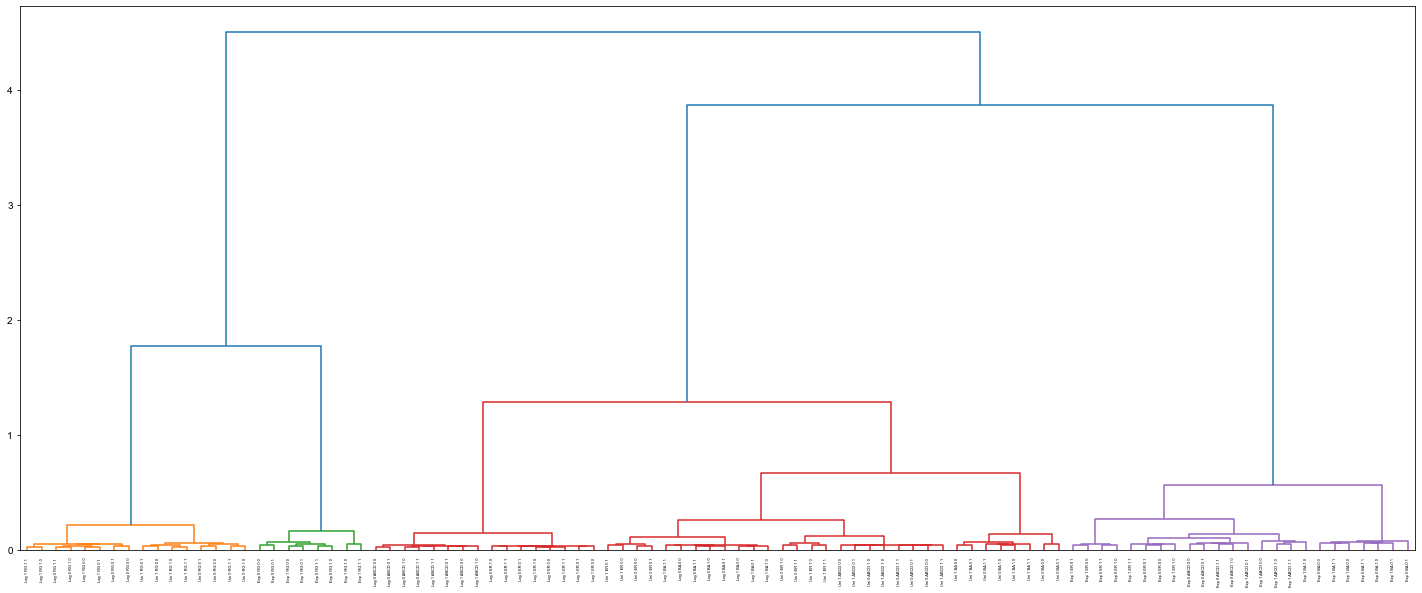

<Figure size 720x360 with 0 Axes>

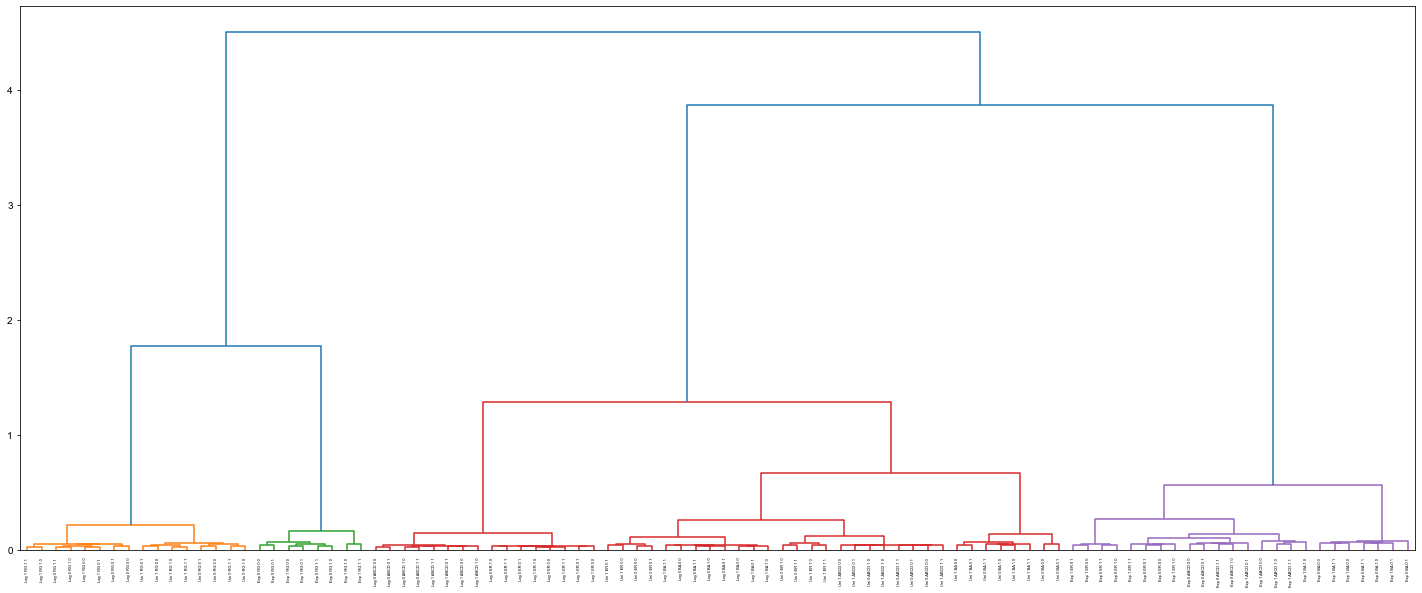

<Figure size 720x360 with 0 Axes>

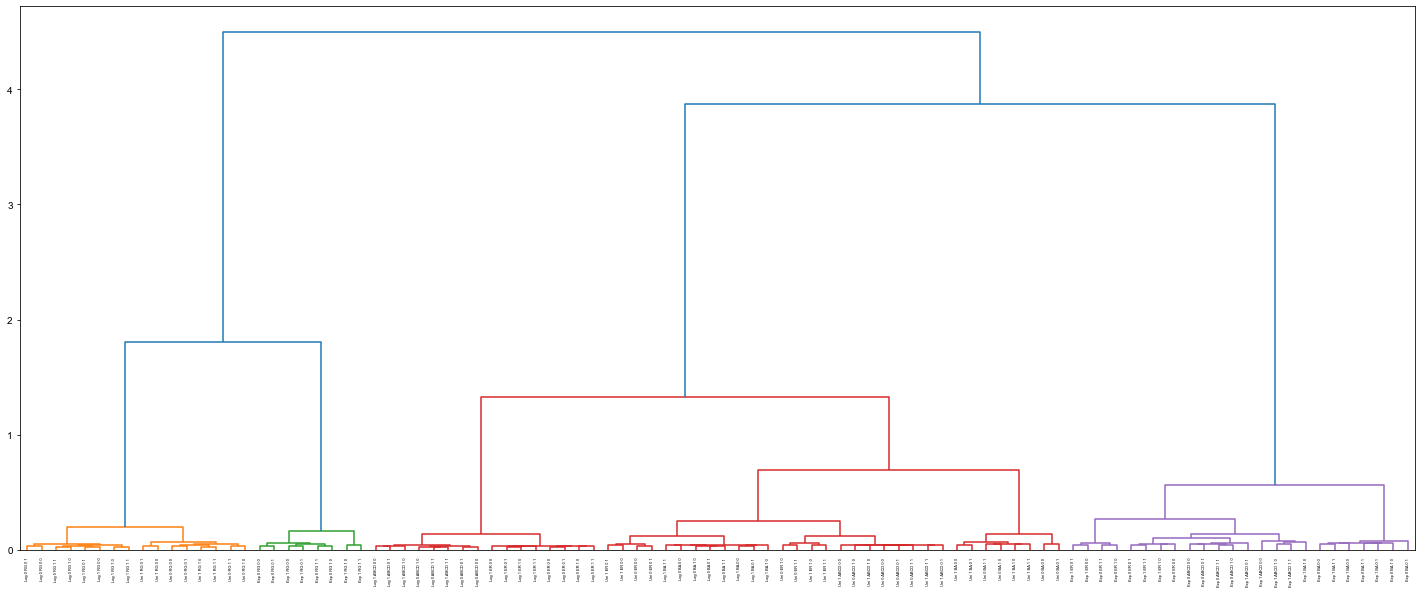

<Figure size 720x360 with 0 Axes>

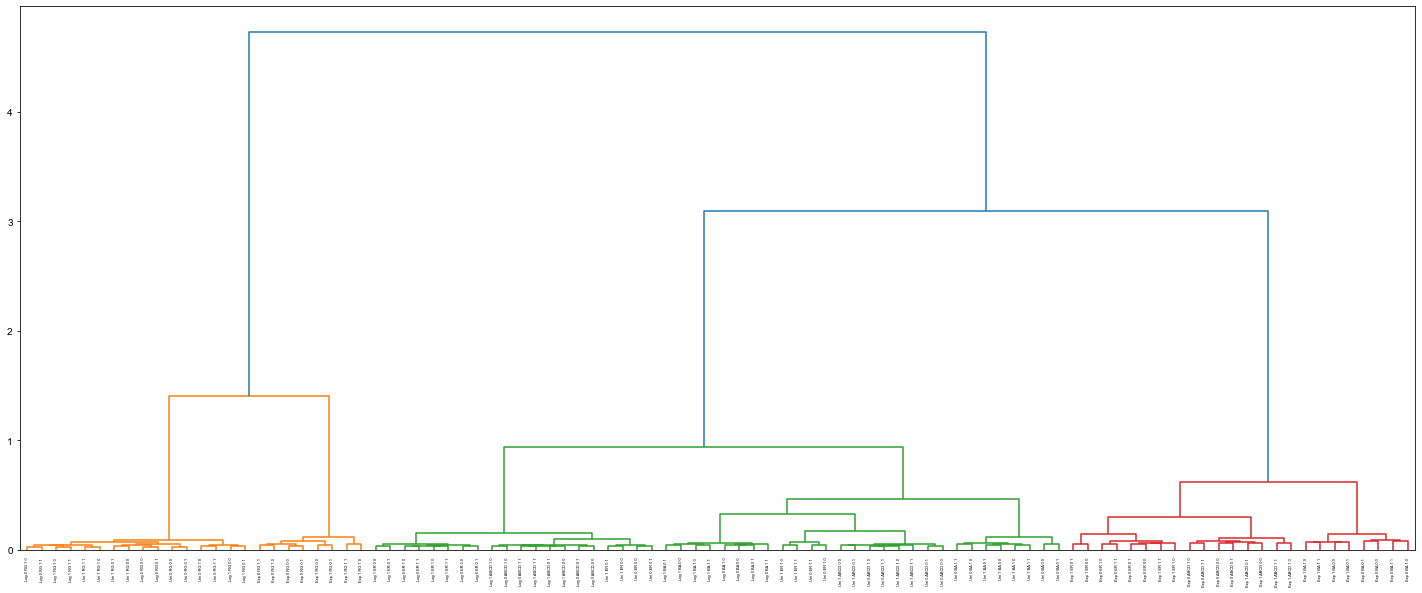

<Figure size 720x360 with 0 Axes>

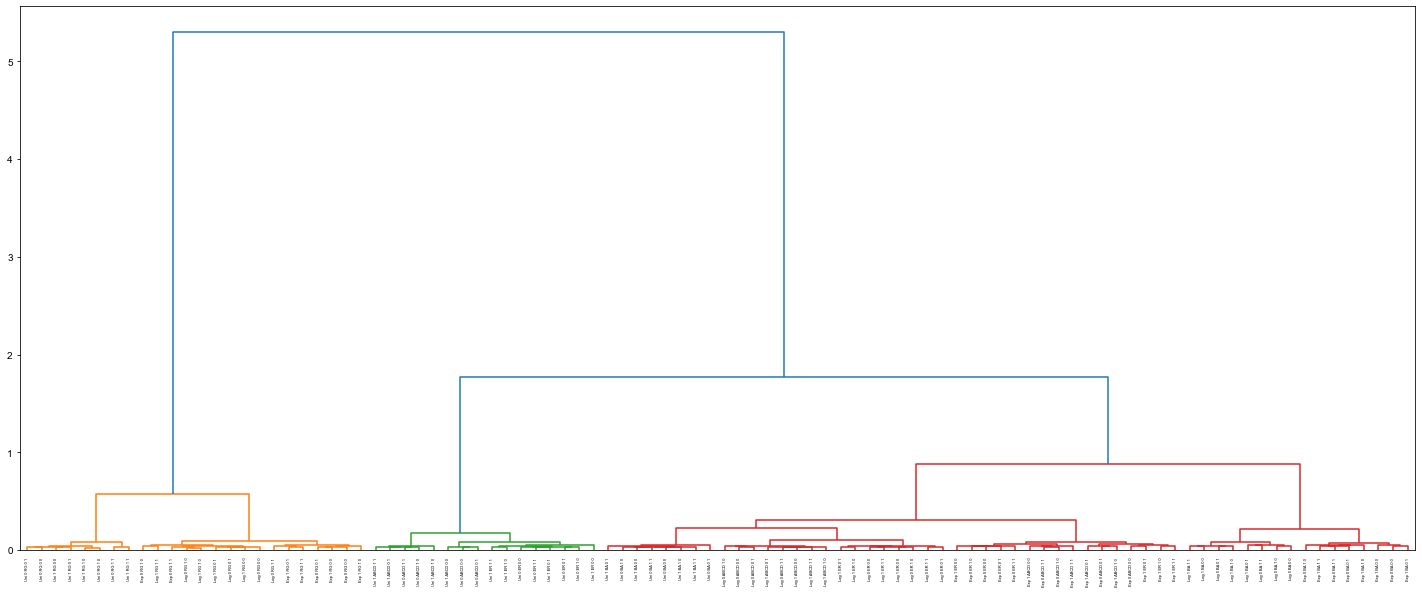

<Figure size 720x360 with 0 Axes>

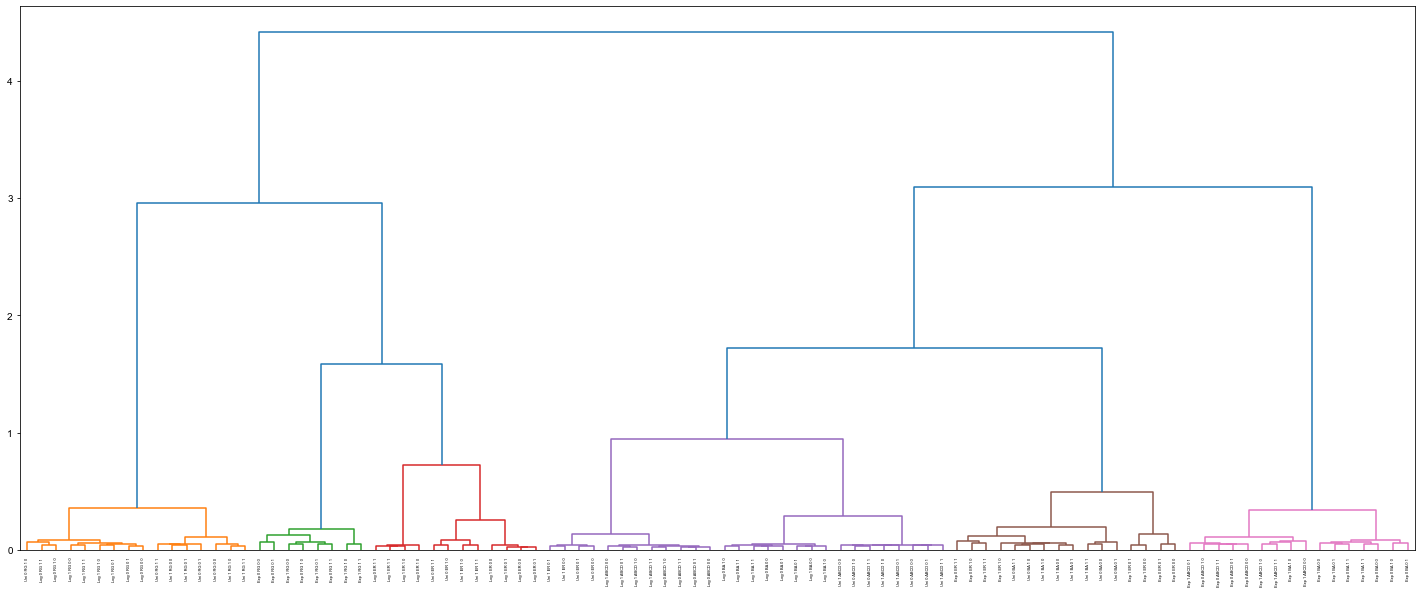

<Figure size 720x360 with 0 Axes>

In [8]:
for metric in METRICS:
    plot.clustering(D_c, metric, labels)